# Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
n_estimators_list = [50, 100, 200]

In [5]:
metrics = {'n_estimators': [], 'RMSE': [], 'MAE': []}

# PreProcessing

In [6]:
for n_estimators in n_estimators_list:
    # Inisialisasi dan melatih model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menghitung metrik RMSE dan MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Menyimpan hasil metrik
    metrics['n_estimators'].append(n_estimators)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)

# Result

In [7]:
result_df = pd.DataFrame(metrics)
print(result_df)

   n_estimators       RMSE        MAE
0            50  55.174261  44.765393
1           100  54.332408  44.053034
2           200  54.461217  44.276124


# Loading Best Model

In [8]:
best_model_idx = result_df['RMSE'].idxmin()
best_n_estimators = result_df.loc[best_model_idx, 'n_estimators']
best_rmse = result_df.loc[best_model_idx, 'RMSE']
best_mae = result_df.loc[best_model_idx, 'MAE']

In [9]:
print(f"\nBest Model (n_estimators={best_n_estimators}):")
print(f"RMSE: {best_rmse}")
print(f"MAE: {best_mae}")


Best Model (n_estimators=100):
RMSE: 54.332408273184846
MAE: 44.053033707865175


# Visualisasi

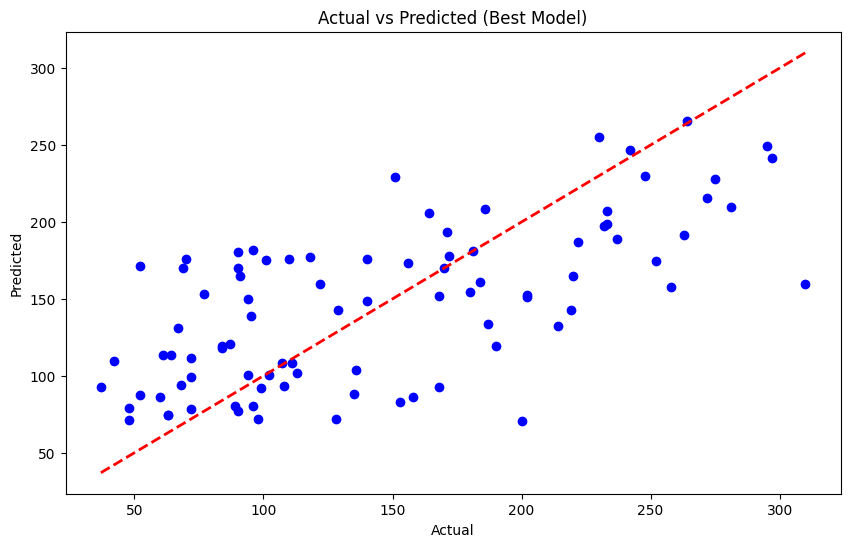

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted (Best Model)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()